In [449]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [450]:
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [451]:
data = pd.read_csv("fake_or_real_news.csv")

In [452]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing special characters
    text = re.sub(r'\W', ' ', text)

    # # Tokenization
    # words = word_tokenize(text)

    # # Removing Stop Words and Applying Stemming
    # stemmer = PorterStemmer()
    # words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]

    # # Joining Words
    # text = ' '.join(words)
    
    return text


In [453]:
# Assuming 'data' is your DataFrame and 'text' is the column with news articles
# data['text'] = data['text'].apply(preprocess_text)


In [454]:
data

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [455]:
data['fake'] = data['label'].apply(lambda x: 0 if x == "REAL" else 1)
data = data.drop("label", axis=1)

In [456]:
X, y = data["text"], data["fake"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

TF-IDF: Term Frequency - Inverse Document Frequency

A metric that indicates how important a word is to a document in a collection. It weighs the improtance of each word in a document based on how often it appears in that document and how often it appears accross all documents in the collection.

TF: Number of times a term t appears in a document
IDF: Logarithm of total number of documents divided by no. of docs that contain term
TF-IDF: TF * IDF

Basically allows us to find the most relevant and distinctive words per document.

In [457]:
# vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
vectorizer = TfidfVectorizer(stop_words='english', 
                             max_df=0.7,  # terms that appear in more than 70% of documents are ignored
                             min_df=3,    # terms that appear in less than 3 documents are ignored
                             ngram_range=(1, 3))  # unigrams and bigrams are considered
X_train_vectorized = vectorizer.fit_transform(X_train) 
X_test_vectorized = vectorizer.transform(X_test)

In [458]:
model_scores = {}
# Add models with empty or placeholder values for their metrics
model_scores['Linear SVC'] = {'accuracy': None, 'TP': None, 'FN': None, 'FP': None, 'TN': None, 'color': "Purples"}
model_scores['Random Forest'] = {'accuracy': None, 'TP': None, 'FN': None, 'FP': None, 'TN': None, 'color': "Greens"}
model_scores['Naive Bayes'] = {'accuracy': None, 'TP': None, 'FN': None, 'FP': None, 'TN': None, 'color': "Oranges"}
model_scores['Ensemble Learning'] = {'accuracy': None, 'TP': None, 'FN': None, 'FP': None, 'TN': None, 'color': "Blues"}

In [459]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def draw_confuion_matrix(title, cmap_choice, score, actual, predictions):
    # Generate the confusion matrix
    cm = confusion_matrix(actual, predictions)

    # Extracting TP, TN, FP, FN from the confusion matrix
    TP = cm[0, 0]
    TN = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # Calculating the total number of predictions
    total = TP + TN + FP + FN

    # Calculating percentages
    TP_percent = (TP / total) 
    TN_percent = (TN / total) 
    FP_percent = (FP / total) 
    FN_percent = (FN / total) 

    # Rounding the percentages
    TP_percent = round(TP_percent, 2)
    TN_percent = round(TN_percent, 2)
    FP_percent = round(FP_percent, 2)
    FN_percent = round(FN_percent, 2)

    score = round(score * 100, 1)
    title = 'Confusion Matrix - ' + title + ": " + str(score) + "%"
    
    # Plotting using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap_choice, xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    # plt.show()

    return TP_percent, TN_percent, FP_percent, FN_percent

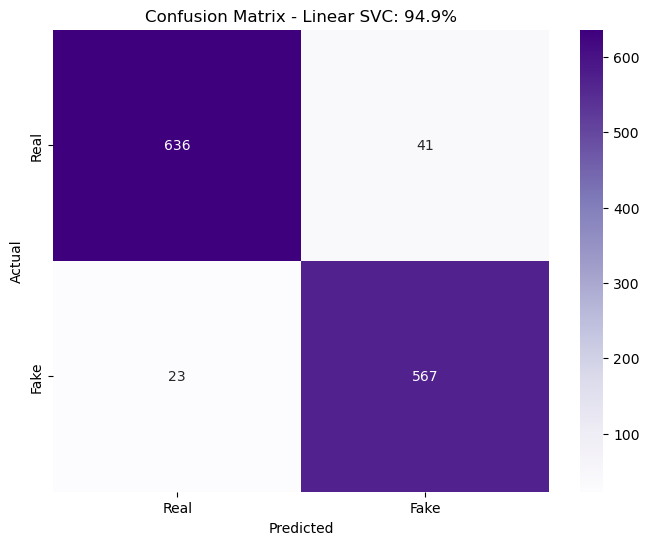

In [460]:
model_name= "Linear SVC"
color = model_scores[model_name]['color'] 
svc_clf = LinearSVC()  # Linear SVC is considered one of the best text classification algorithms
svc_clf.fit(X_train_vectorized, y_train)
score= svc_clf.score(X_test_vectorized, y_test)
predictions = svc_clf.predict(X_test_vectorized)
tp, tn, fp, fn = draw_confuion_matrix(model_name,color,score, y_test,predictions)
model_scores[model_name]['accuracy'] = score
model_scores[model_name]['TP'] = tp
model_scores[model_name]['TN'] = tn
model_scores[model_name]['FP'] = fp
model_scores[model_name]['FN'] = fn

In [461]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# model = Sequential()
# model.add(Dense(10, activation='relu', input_dim=X_train_vectorized.shape[1]))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train_vectorized, y_train, epochs=5, batch_size=8)
# nn_accuracy = model.evaluate(X_test_vectorized, y_test, verbose=0)[1]
# predictions = model.predict(X_test_vectorized)
# draw_confuion_matrix("Neural Network",'Blues',y_test,predictions)



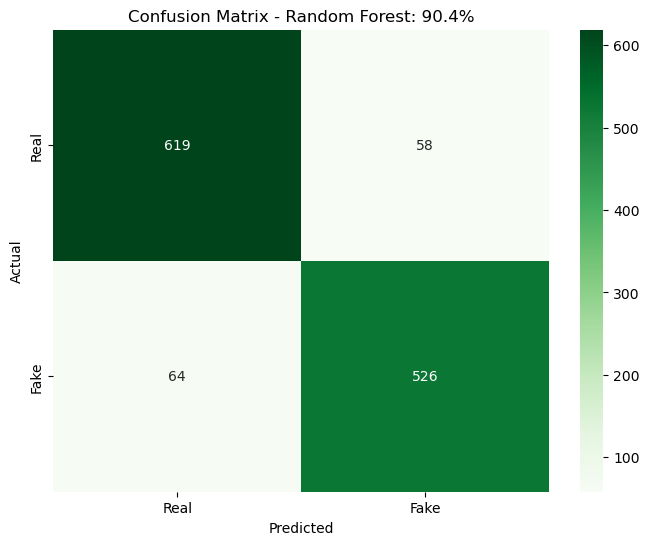

In [462]:
from sklearn.ensemble import RandomForestClassifier
model_name= "Random Forest"
color = model_scores[model_name]['color'] 
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_vectorized, y_train)
score = rf_clf.score(X_test_vectorized, y_test)
model_scores[model_name]['accuracy'] = score
predictions = rf_clf.predict(X_test_vectorized)
tp, tn, fp, fn = draw_confuion_matrix(model_name,color,score, y_test,predictions)
model_scores[model_name]['accuracy'] = score
model_scores[model_name]['TP'] = tp
model_scores[model_name]['TN'] = tn
model_scores[model_name]['FP'] = fp
model_scores[model_name]['FN'] = fn



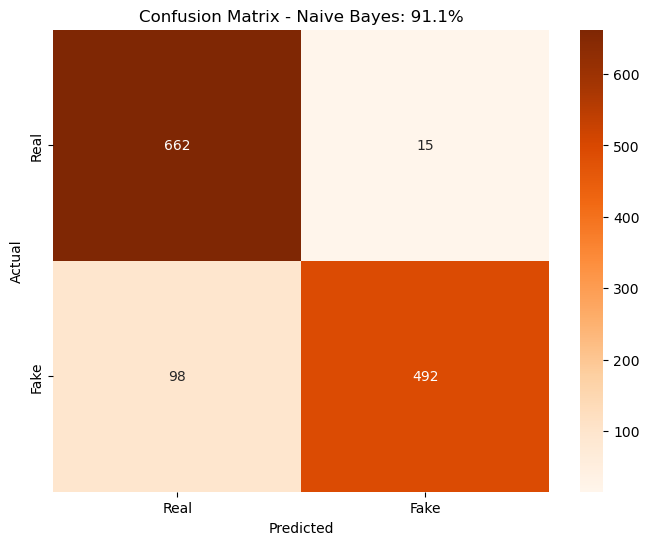

In [463]:
from sklearn.naive_bayes import MultinomialNB
model_name= "Naive Bayes"
color = model_scores[model_name]['color'] 
nb_clf = MultinomialNB()
nb_clf.fit(X_train_vectorized, y_train)
score= nb_clf.score(X_test_vectorized, y_test)
model_scores[model_name]['accuracy'] = score
predictions = nb_clf.predict(X_test_vectorized)
tp, tn, fp, fn = draw_confuion_matrix(model_name,color,score,y_test,predictions)
model_scores[model_name]['accuracy'] = score
model_scores[model_name]['TP'] = tp
model_scores[model_name]['TN'] = tn
model_scores[model_name]['FP'] = fp
model_scores[model_name]['FN'] = fn

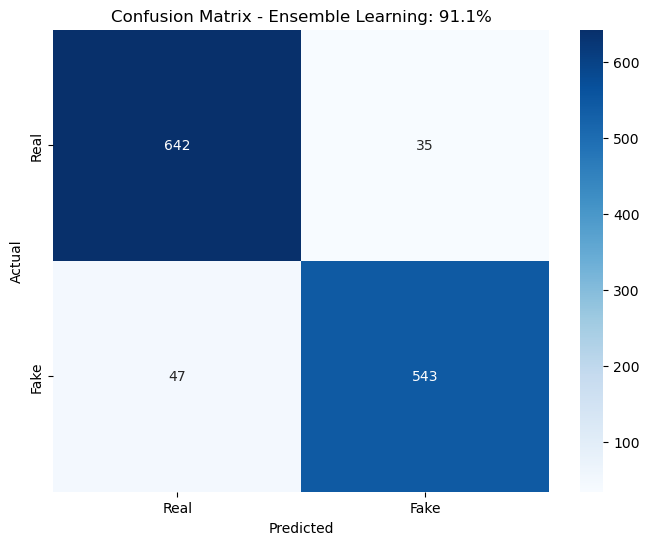

In [464]:
from sklearn.ensemble import VotingClassifier
model_name= "Ensemble Learning"
color = model_scores[model_name]['color'] 
# Create a list of tuples for the estimators
estimators = [('naive_bayes', nb_clf), ('random_forest', rf_clf), ('svm', svc_clf)]
# Create the ensemble model
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train_vectorized, y_train)
ensemble_score = ensemble.score(X_test_vectorized, y_test)
model_scores[model_name]['accuracy'] = ensemble_score
predictions = ensemble.predict(X_test_vectorized)
tp, tn, fp, fn = draw_confuion_matrix(model_name,color,score,y_test,predictions)
model_scores[model_name]['accuracy'] = score
model_scores[model_name]['TP'] = tp
model_scores[model_name]['TN'] = tn
model_scores[model_name]['FP'] = fp
model_scores[model_name]['FN'] = fn


In [465]:
model_scores.items()

dict_items([('Linear SVC', {'accuracy': 0.9494869771112865, 'TP': 0.5, 'FN': 0.02, 'FP': 0.03, 'TN': 0.45, 'color': 'Purples'}), ('Random Forest', {'accuracy': 0.9037095501183899, 'TP': 0.49, 'FN': 0.05, 'FP': 0.05, 'TN': 0.42, 'color': 'Greens'}), ('Naive Bayes', {'accuracy': 0.9108129439621152, 'TP': 0.52, 'FN': 0.08, 'FP': 0.01, 'TN': 0.39, 'color': 'Oranges'}), ('Ensemble Learning', {'accuracy': 0.9108129439621152, 'TP': 0.51, 'FN': 0.04, 'FP': 0.03, 'TN': 0.43, 'color': 'Blues'})])

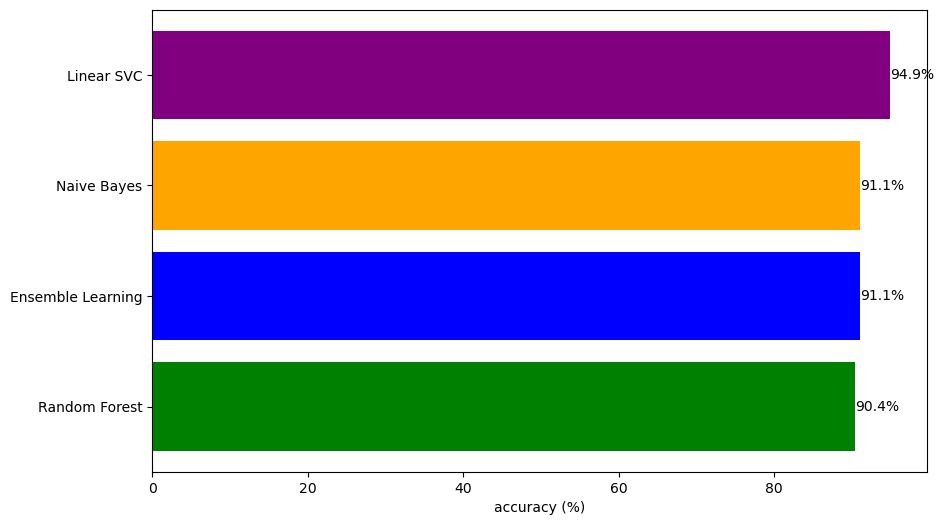

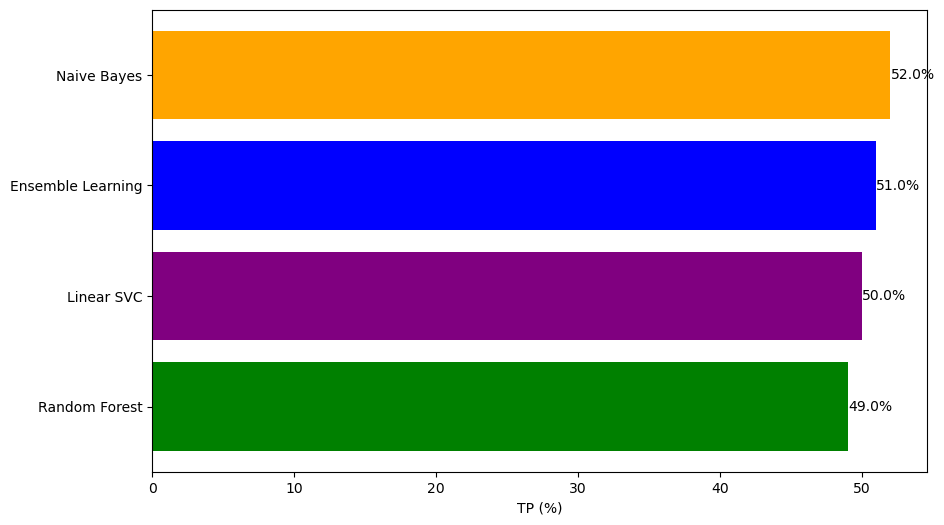

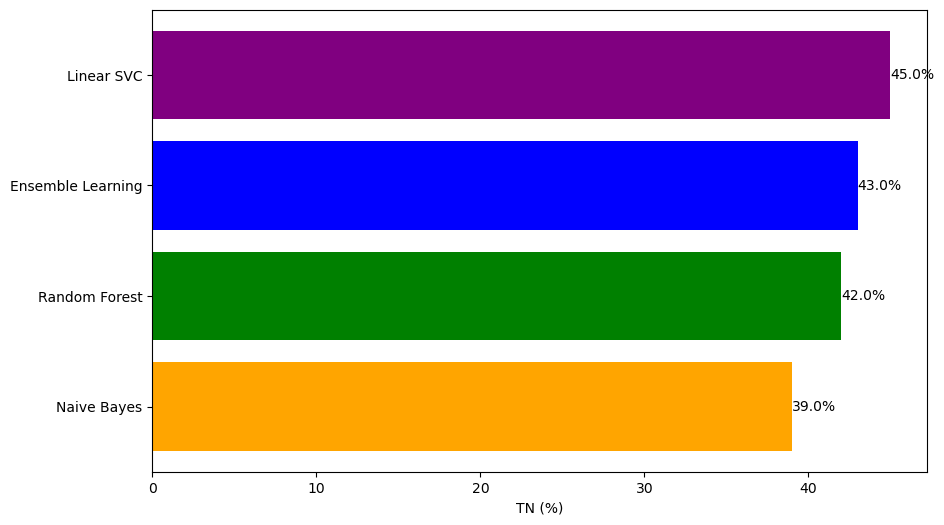

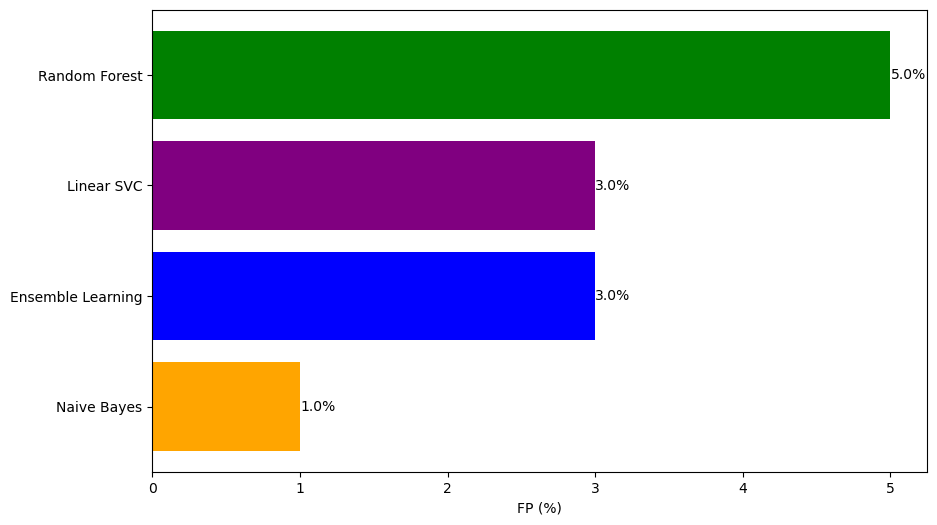

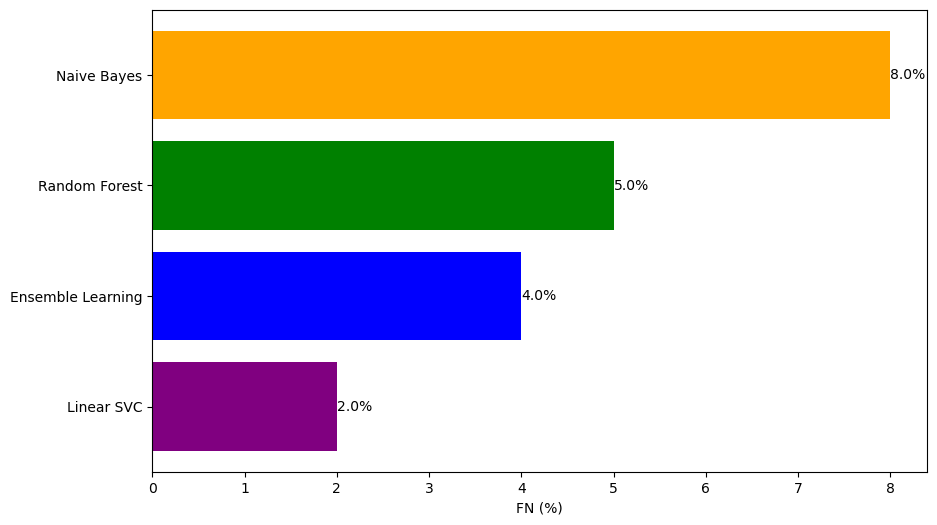

In [466]:
import matplotlib.pyplot as plt

def draw_performance_graph(performance_type):
    # Extract models, accuracies, and colors
    models, performances, colors = zip(*[(model, data[performance_type], data['color']) 
                                         for model, data in sorted(model_scores.items(), 
                                                                   key=lambda item: item[1][performance_type], 
                                                                   reverse=True)])
   
    # Convert each color to lowercase and remove the trailing 's'
    colors = [color.lower()[:-1] if color.endswith('s') else color.lower() for color in colors]
    
    # Convert performances to percentages
    performances = [performance * 100 for performance in performances]
    
    # Creating the horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(models, performances, color=colors)

    # plt.ylabel('Models')
    plt.xlabel(performance_type + " (%)")
    # plt.title(performance_type)

    # Optional: Adding the percentage next to each bar
    for i in range(len(models)):
        plt.text(performances[i], i, f'{performances[i]:.1f}%', va='center')

    # Invert y-axis to have the highest value at the top
    plt.gca().invert_yaxis()

    # Show the plot
    plt.show()

    
draw_performance_graph('accuracy')
draw_performance_graph('TP')
draw_performance_graph('TN')
draw_performance_graph('FP')
draw_performance_graph('FN')

